In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
image_path = 'pxfuel.jpg'

In [4]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

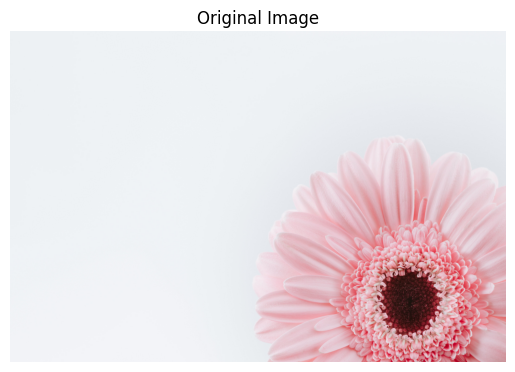

In [5]:
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [6]:
pixels = image.reshape((-1, 3))


In [7]:
k = 5

In [8]:
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)

KMeans(n_clusters=5, random_state=42)

In [9]:
colors = np.array(kmeans.cluster_centers_, dtype='uint8')
labels = kmeans.labels_

In [10]:
def plot_colors(colors, labels):
    counts = np.bincount(labels)
    sorted_idx = np.argsort(-counts)
    sorted_colors = colors[sorted_idx]
    sorted_counts = counts[sorted_idx]

    bar = np.zeros((50, 300, 3), dtype='uint8')
    start = 0

    for i in range(len(sorted_colors)):
        end = start + int(300 * (sorted_counts[i] / sum(sorted_counts)))
        bar[:, start:end] = sorted_colors[i]
        start = end

    return bar

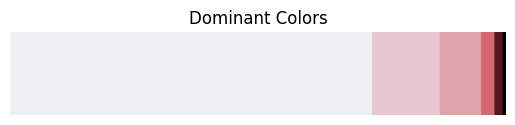

In [11]:
color_bar = plot_colors(colors, labels)
plt.imshow(color_bar)
plt.title("Dominant Colors")
plt.axis('off')
plt.show()

